In [2]:
%load_ext autoreload
%autoreload 2

import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline



import flotilla

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)


darkblue, green, red, purple, yellow, lightblue = sns.color_palette('deep')
modality_order = ['~0', 'middle', '~1', 'bimodal', 'ambiguous']
modality_colors = {'~0': lightblue, 'middle': green, '~1': red, 'bimodal': purple, 'ambiguous': yellow}

modality_factorplot_kws = dict(hue_order=modality_order, order=study.phenotype_order)

2015-09-30 09:42:17	Reading datapackage from /home/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2015-09-30 09:42:17	Parsing datapackage to create a Study object
2015-09-30 09:43:27	Initializing Study
2015-09-30 09:43:27	Initializing Predictor configuration manager for Study
2015-09-30 09:43:27	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-09-30 09:43:27	Added ExtraTreesClassifier to default predictors
2015-09-30 09:43:27	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-09-30 09:43:27	Added ExtraTreesRegressor to default predictors
2015-09-30 09:43:27	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-09-30 09:43:27	Added GradientBoostingClassifier to default predictors
2015-09-30 09:43:27	Predictor GradientBoostingRegressor is of type <class 'skle

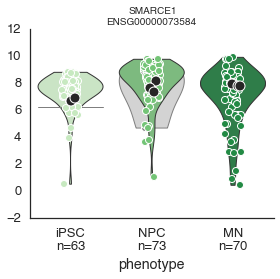

In [3]:
study.plot_gene('SMARCE1')

In [4]:
# ubiquitin_events = study.splicing.maybe_renamed_to_feature_id('UBC')
# print study.splicing.data.shape
# study.splicing.data = study.splicing.data.loc[:, ~study.splicing.data.columns.isin(ubiquitin_events)]
# print study.splicing.data.shape

In [5]:
splicing_singles_no_outliers = study.splicing.singles.ix[not_outliers]
print splicing_singles_no_outliers.shape

(181, 35974)


In [6]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities'


In [7]:
mkdir /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities': File exists


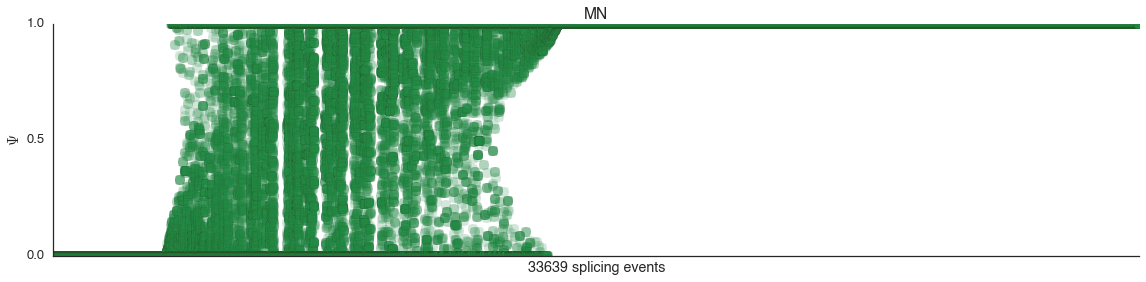

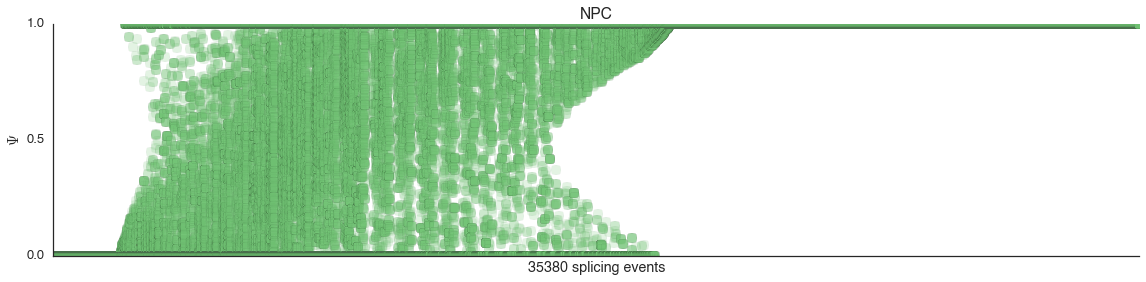

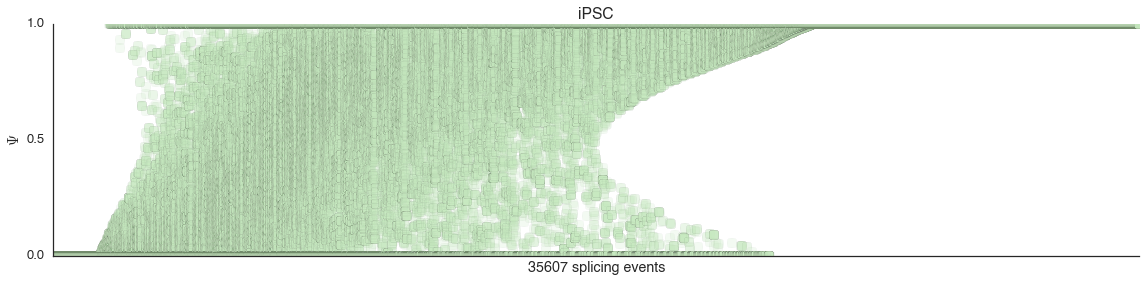

In [8]:
for phenotype, data in splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype):

    flotilla.visualize.splicing.lavalamp(data, color=study.phenotype_to_color[phenotype], title=phenotype)

    fig = plt.gcf()
    fig.tight_layout()
    fig.savefig('{}/lavalamp_{}.png'.format(folder, phenotype))

## Estimate modalities

### Initialize the modality estimator

In [9]:
import modish

estimator = modish.ModalityEstimator()

In [10]:
# fig = estimator.violinplot(n=1e6)
# for ax in fig.axes:
#     ax.set(yticks=[0, 0.5, 1], xlabel='')
# fig.tight_layout()
# sns.despine()
# fig.savefig('{}/modality_estimator_parameterized_family.pdf'.format(folder))

### Plot the ideal modalities

In [13]:
[x for x in study.metadata.data.index if x not in study.splicing.data.index]

['M5_01',
 'M5_02',
 'M5_03',
 'M5_04',
 'N2_03',
 'N2_10',
 'P6_01',
 'P6_02',
 'P6_03',
 'P6_04']

In [14]:
[x for x in study.splicing.data.index if 'MSA' in x]

[]

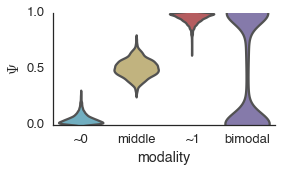

In [11]:
from modish.visualize import MODALITY_ORDER, MODALITY_TO_COLOR, MODALITY_PALETTE
import matplotlib as mpl

n = 1000
dfs = []

for model_name, model in estimator.models.items():
    s = pd.Series(model.rvs[-1].rvs(n))
    df = s.to_frame()
    df['modality'] = model_name
    dfs.append(df)
ideal_modalities = pd.concat(dfs)
ideal_modalities = ideal_modalities.rename(columns={0: '$\Psi$'})



order = MODALITY_ORDER[:-1]

fig, ax = plt.subplots(figsize=(4, 2.5))
sns.violinplot(x='modality', y='$\Psi$', data=ideal_modalities, order=order,
                   scale='width', ax=ax, bw=.2, inner=None, palette=MODALITY_PALETTE)
ax.set(ylim=(0, 1), yticks=(0, 0.5, 1))
sns.despine()
fig.tight_layout()
fig.savefig('{}/ideal_modalities.pdf'.format(folder))
fig.savefig('b_ideal_modalities.png', dpi=150)

### Plot one-parameter and two-parameter models separately

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/ideal_modalities_n_parameters1.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/ideal_modalities_n_parameters2.pdf


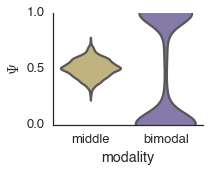

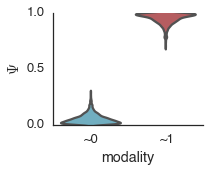

In [16]:
ideal_modalities['n_parameters'] = ideal_modalities.modality.map(lambda x: 2 if x in ('~0', '~1') else 1)

for n_parameters, df in ideal_modalities.groupby('n_parameters'):
    fig, ax = plt.subplots(figsize=(3, 2.5))
    order = [x for x in modality_order if x in df.modality.unique()]
    palette = [MODALITY_TO_COLOR[x] for x in order]
    sns.violinplot(x='modality', y='$\Psi$', data=df, order=order, 
                   palette=palette,
                       scale='width', ax=ax, bw=.2, inner=None)
    ax.set(ylim=(0, 1), yticks=(0, 0.5, 1))
    sns.despine()
    fig.tight_layout()
    pdf = '{}/ideal_modalities_n_parameters{}.pdf'.format(folder, n_parameters)
    print pdf
    fig.savefig(pdf)

## Calculate/Estimate modalities only on single cells, with no outliers

And at least 20 cells per splicing event, per celltype/phenotype

In [34]:
print splicing_singles_no_outliers.shape
splicing_singles_no_outliers = splicing_singles_no_outliers.groupby(
    study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh=20, axis=1))
print splicing_singles_no_outliers.shape

(181, 35974)
(181, 26900)


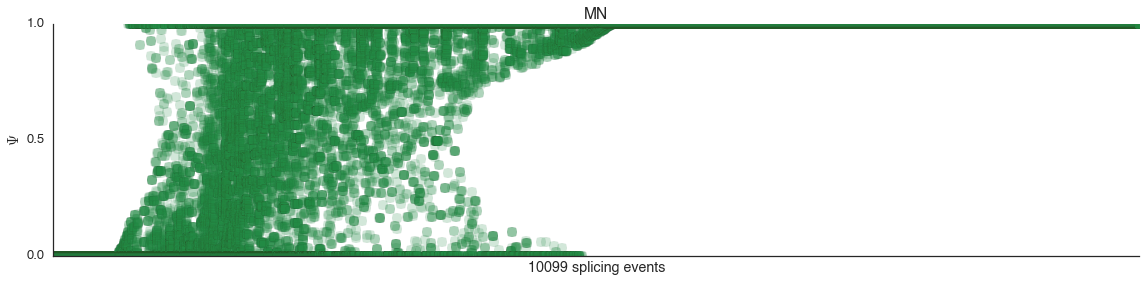

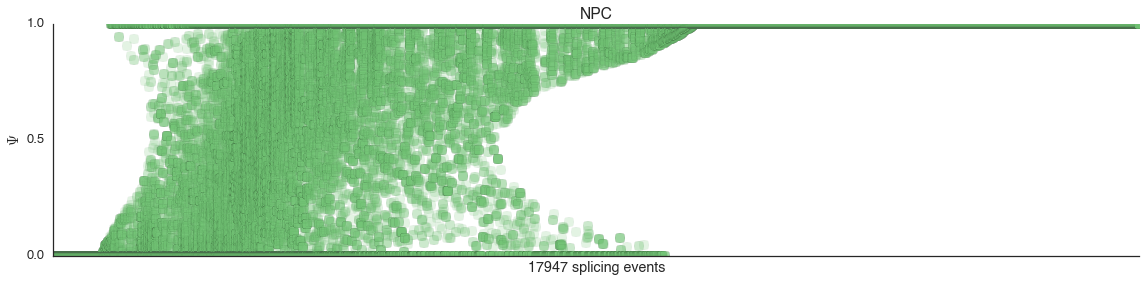

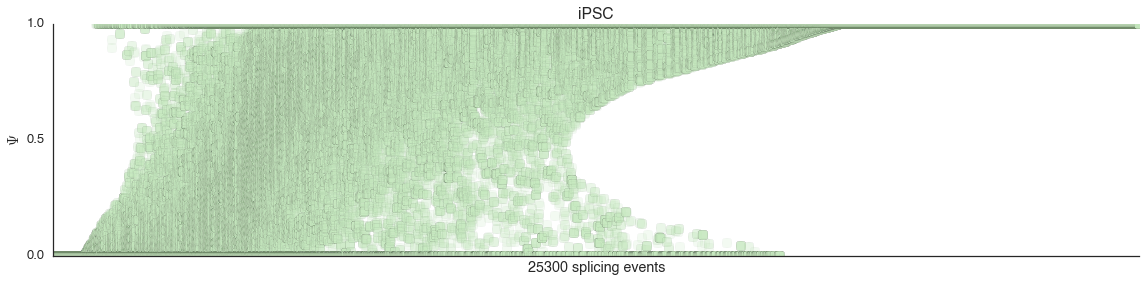

In [47]:
for phenotype, data in splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype):

    flotilla.visualize.splicing.lavalamp(data, color=study.phenotype_to_color[phenotype], title=phenotype)

    fig = plt.gcf()
    fig.tight_layout()
    fig.savefig('{}/lavalamp_{}_20cells.png'.format(folder, phenotype))

In [17]:
%time modality_scores = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype).apply(estimator.fit_transform)

CPU times: user 1h 10min 55s, sys: 27.8 s, total: 1h 11min 23s
Wall time: 1h 11min 29s


Look at the scores

In [18]:
modality_scores

exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-  \
phenotype                                                                                                               
MN        ~0                                                     NaN                                                    
          ~1                                                     NaN                                                    
          bimodal                                                NaN                                                    
          middle                                                 NaN                                                    
NPC       ~0                                                     NaN                                                    
          ~1                                                     NaN                                                    
          bimodal                                                NaN                                                    
          middle                                                 NaN                                                    
iPSC      ~0                                              -17.366604                                                    
          ~1                                              -93.340907                                                    
          bimodal                                          61.456993                                                    
          middle                                         -100.113302                                                    

                   exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-  \
phenotype                                                                                                               
MN        ~0                                                     NaN                                                    
          ~1                                                     NaN                                                    
          bimodal                                                NaN                                                    
          middle                                                 NaN                                                    
NPC       ~0                                                     NaN                                                    
          ~1                                                     NaN                                                    
          bimodal                                                NaN                                                    
          middle                                                 NaN                                                    
iPSC      ~0                                              -17.366604                                                    
          ~1                                              -93.340907                                                    
          bimodal                                          61.456993                                                    
          middle                                         -100.113302                                                    

                   exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-  \
phenotype                                                                                                               
MN        ~0                                                     NaN                                                    
          ~1                                                     NaN                                                    
          bimodal                                                NaN                                                    
          middle        

Make a "tidy"/"tall" version of the modalities

In [19]:
modality_scores_tidy = pd.melt(modality_scores.reset_index(), id_vars=['phenotype', 'level_1'], 
                               var_name='event_name', value_name='log2_bayes_factor')
modality_scores_tidy = modality_scores_tidy.rename(columns={'level_1': 'modality'})
modality_scores_tidy = modality_scores_tidy.dropna()
print modality_scores_tidy.shape
modality_scores_tidy.head()

(261254, 4)


,phenotype,modality,event_name,log2_bayes_factor
8,iPSC,~0,exon:chr10:100190328-100190427:-@exon:chr10:10...,-17.366604
9,iPSC,~1,exon:chr10:100190328-100190427:-@exon:chr10:10...,-93.340907
10,iPSC,bimodal,exon:chr10:100190328-100190427:-@exon:chr10:10...,61.456993
11,iPSC,middle,exon:chr10:100190328-100190427:-@exon:chr10:10...,-100.113302
20,iPSC,~0,exon:chr10:100190328-100190427:-@exon:chr10:10...,-17.366604


### Plot the $\log_2$ Bayes factors for the modalities

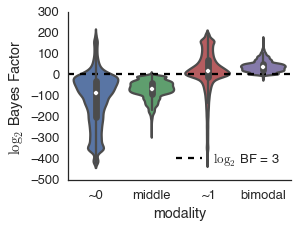

In [20]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.violinplot(x='modality', y='log2_bayes_factor', data=modality_scores_tidy, order=['~0', 'middle', '~1', 'bimodal'],
              scale='width')
# sns.stripplot(x='modality', y='log2_bayes_factor', data=modality_scores_tidy, jitter=True)
xmin, xmax = ax.get_xlim()
ax.set_ylabel('$\log_2$ Bayes Factor')
ax.hlines(3, xmin, xmax, linestyle='dashed', label='$\log_2$ BF = 3')
ax.legend(loc='best')
sns.despine()

In [21]:
modality_scores_tidy.to_csv('{}/modalities_log2bf_tidy.csv'.format(folder), 
                            index=False)

In [22]:
modality_scores_tidy = pd.read_csv('{}/modalities_log2bf_tidy.csv'.format(folder))

Make sure RPS24 is middle for iPSC

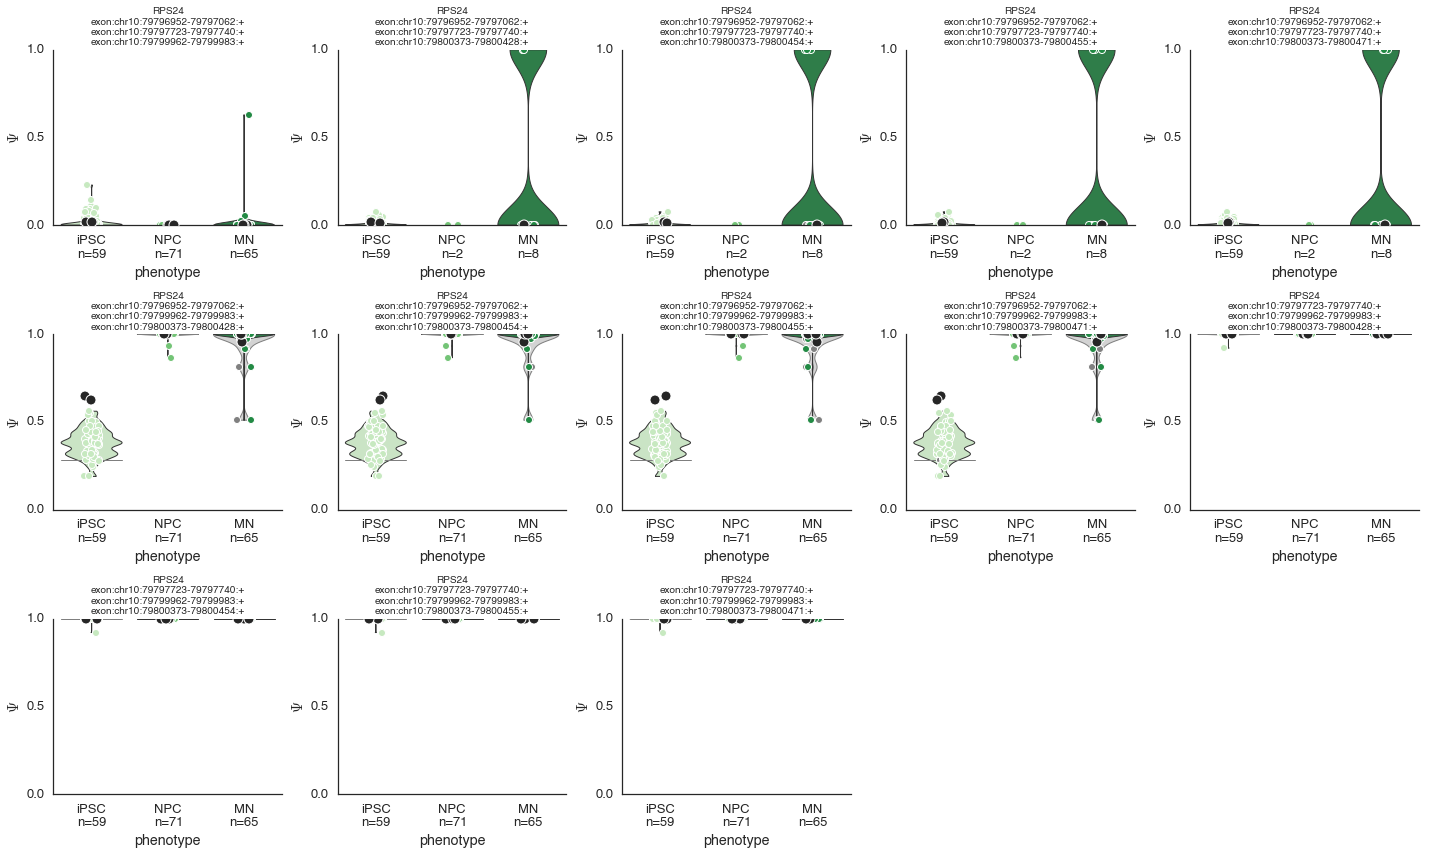

In [24]:
study.plot_event('RPS24')

In [26]:
rps24_junctions = study.splicing.maybe_renamed_to_feature_id("RPS24")

middle_rps24_junction = rps24_junctions[6]

modality_scores_tidy.loc[modality_scores_tidy.event_name == middle_rps24_junction]

,phenotype,modality,event_name,log2_bayes_factor
6842,MN,~0,exon:chr10:79796952-79797062:+@exon:chr10:7979...,-342.652556
6843,MN,~1,exon:chr10:79796952-79797062:+@exon:chr10:7979...,157.997542
6844,NPC,~0,exon:chr10:79796952-79797062:+@exon:chr10:7979...,-410.163615
6845,NPC,~1,exon:chr10:79796952-79797062:+@exon:chr10:7979...,189.412439
6846,iPSC,~0,exon:chr10:79796952-79797062:+@exon:chr10:7979...,8.998583
6847,iPSC,~1,exon:chr10:79796952-79797062:+@exon:chr10:7979...,-20.137133


Make sure PKM is bimodal for motor neurons

In [28]:
pkm_events = study.splicing.maybe_renamed_to_feature_id('PKM')
modality_scores_tidy.ix[modality_scores_tidy.event_name.isin(pkm_events)]

,phenotype,modality,event_name,log2_bayes_factor
70482,MN,~0,exon:chr15:72499069-72499139:-@exon:chr15:7249...,-120.967926
70483,MN,~1,exon:chr15:72499069-72499139:-@exon:chr15:7249...,53.148292
70484,NPC,~0,exon:chr15:72499069-72499139:-@exon:chr15:7249...,-381.981466
70485,NPC,~1,exon:chr15:72499069-72499139:-@exon:chr15:7249...,175.661645
70486,iPSC,~0,exon:chr15:72499069-72499139:-@exon:chr15:7249...,-355.292637
70487,iPSC,~1,exon:chr15:72499069-72499139:-@exon:chr15:7249...,163.871178
70488,MN,~0,exon:chr15:72499069-72499139:-@exon:chr15:7249...,-120.967926
70489,MN,~1,exon:chr15:72499069-72499139:-@exon:chr15:7249...,53.148292
70490,NPC,~0,exon:chr15:72499069-72499139:-@exon:chr15:7249...,-381.981466
70491,NPC,~1,exon:chr15:72499069-72499139:-@exon:chr15:7249...,175.661645


### From the scores, assign the most likely modality to each event, per celltype

Notice that we're using the "untidy"/2d/"wide" dataframe of the modality scores

In [29]:

%time modality_assignments = modality_scores.groupby(level=0, axis=0).apply(estimator.assign_modalities, reset_index=True)
modality_assignments
modalities_tidy = modality_assignments.unstack().reset_index()
modalities_tidy = modalities_tidy.rename(columns={'level_0': 'event_name', 0:'modality'})
modalities_tidy = modalities_tidy.dropna()
modalities_tidy.head()

CPU times: user 5.22 s, sys: 12 ms, total: 5.23 s
Wall time: 5.23 s


,event_name,phenotype,modality
2,exon:chr10:100190328-100190427:-@exon:chr10:10...,iPSC,bimodal
5,exon:chr10:100190328-100190427:-@exon:chr10:10...,iPSC,bimodal
8,exon:chr10:100190328-100190427:-@exon:chr10:10...,iPSC,bimodal
11,exon:chr10:100193697-100193848:-@exon:chr10:10...,iPSC,bimodal
12,exon:chr10:100195392-100195529:-@exon:chr10:10...,MN,bimodal


In [39]:
phenotype_event_count = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype).count()
phenotype_event_count = phenotype_event_count.unstack()
phenotype_event_count = phenotype_event_count.reset_index()
phenotype_event_count = phenotype_event_count.rename(columns={'level_0': 'event_name', 0: 'n_cells'})
print phenotype_event_count.shape
phenotype_event_count = phenotype_event_count.loc[phenotype_event_count.n_cells >= 20]
print phenotype_event_count.shape
phenotype_event_count.head()

(80700, 3)
(53346, 3)


,event_name,phenotype,n_cells
1,exon:chr10:101165513-101165617:-@exon:chr10:10...,NPC,22
2,exon:chr10:101165513-101165617:-@exon:chr10:10...,iPSC,30
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,NPC,20
5,exon:chr10:101480744-101480825:-@exon:chr10:10...,iPSC,34
8,exon:chr10:101507014-101507147:+@exon:chr10:10...,iPSC,40


In [41]:
modalities_tidy.shape

(104626, 3)

In [42]:
modalities_tidy = modalities_tidy.merge(phenotype_event_count, 
                                        left_on=['event_name', 'phenotype'], 
                                        right_on=['event_name', 'phenotype'])

In [43]:
modalities_tidy.to_csv('{}/modalities_tidy.csv'.format(folder), index=False)

In [44]:
study.supplemental.modalities_tidy = pd.read_csv('{}/modalities_tidy.csv'.format(folder))

In [ ]:
study.save('singlecell_pnm_figure2_modalities')